In [28]:
#importing libraries
import requests
import pandas as pd
import numpy as np
import random
from geopy import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
!conda install -c conda-forge folium=0.5.0 --yes
import folium
import matplotlib.pyplot as plt

Solving environment: done

# All requested packages already installed.



In [29]:
#finding coordinates
address = 'Akrotiri, Santorini, South Aegean'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [30]:
#inserting client id and secret (the ID and secret have been hidden)
CLIENT_ID = '########################################' 
CLIENT_SECRET = '########################################' 
VERSION = '20180604'
LIMIT = 150

In [31]:
#searching for beaches in the area
search_query = 'beach'
radius = 5000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [32]:
results = requests.get(url).json()
venues = results['response']['venues']
beaches = json_normalize(venues)

In [33]:
#searching for nearby reastaurants
search_query = 'restaurant'
radius = 5000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [34]:
results = requests.get(url).json()
venues = results['response']['venues']
restaurants = json_normalize(venues)

In [35]:
#searching for nearby cafeterias
search_query = 'coffee'
radius = 5000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [36]:
results = requests.get(url).json()
venues = results['response']['venues']
coffee = json_normalize(venues)

In [37]:
#reworking the dataframes
beaches.columns = [column.split('.')[-1] for column in beaches.columns]
restaurants.columns = [column.split('.')[-1] for column in restaurants.columns]
coffee.columns = [column.split('.')[-1] for column in coffee.columns]

In [38]:
#map of the beaches in the area
rest_map = folium.Map(location=[latitude, longitude], zoom_start=14)

for lat, lng in zip(beaches.lat, beaches.lng):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(rest_map)
    
rest_map

In [39]:
#map of the beaches in the area with the nearby resaurants and cafeterias
rest_map = folium.Map(location=[latitude, longitude], zoom_start=14)

for lat, lng in zip(beaches.lat, beaches.lng):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(rest_map)
    
for lat, lng in zip(restaurants.lat, restaurants.lng):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='orange',
        fill = True,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(rest_map)
    
for lat, lng in zip(coffee.lat, coffee.lng):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(rest_map)

rest_map

In [40]:
coffee['name'].shape

(1,)

In [41]:
restaurants['name'].shape

(29,)

Text(0.5, 1.0, 'Number of restaurants and cafeterias in the area')

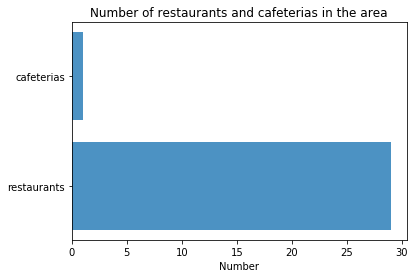

In [46]:
#analyzing the number of cafeterias and restaurants in the area
objects=('restaurants','cafeterias')
y=np.arange(len(objects))
x=[29,1]

plt.barh(y,x,align='center',alpha=0.8)
plt.yticks(y,objects)
plt.xlabel('Number')
plt.title('Number of restaurants and cafeterias in the area')